In [1]:
from osgeo import gdal
from osgeo import osr
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as mcol
from matplotlib.colors import ListedColormap

In [96]:
# DEFININDO OS PARÂMETROS INICIAIS

# MODIFICAR O ENDEREÇO DA IMAGEM
filename = 'MHW_I_CLIP.tif'

dataset = gdal.Open(filename, gdal.GA_ReadOnly)
band = dataset.GetRasterBand(1)
array = band.ReadAsArray().astype(float)

# MODIFICAR OS VALORES DE PERCENTIL, MÉDIA SAZONAL E DELTA_T PARA CADA MHW
above98th =  28.411854363887397
above90th = 27.99972558492612
delta_t = 0.4948361510041881
seasonal_avg = 0.9104645417543481
diff_99_90 = above98th - above90th

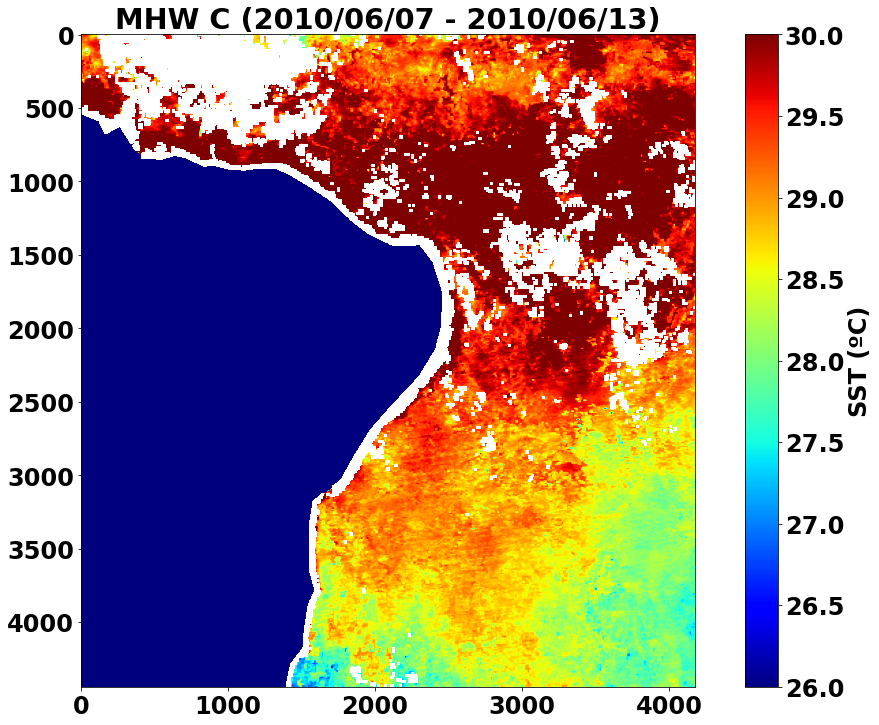

In [99]:
# PLOTANDO A IMAGEM ORIGINAL

# ATUALIZANDO TAMANHO DE TEXTO, LEGENDAS ETC
plt.rcParams.update({'font.size': 24})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.figure(figsize=(18, 12))

# MODIFICAR TÍTULO DA FIGURA
plt.title("MHW C (2010/06/07 - 2010/06/13)", fontweight='bold')
plt.imshow(array, cmap='jet')
plt.clim(26,30)
plt.colorbar(label='SST (ºC)')

# MODIFICAR NOME DO ARQUIVO PARA SALVAR
plt.savefig('mhw_c_original.png',dpi=200, bbox_inches='tight')

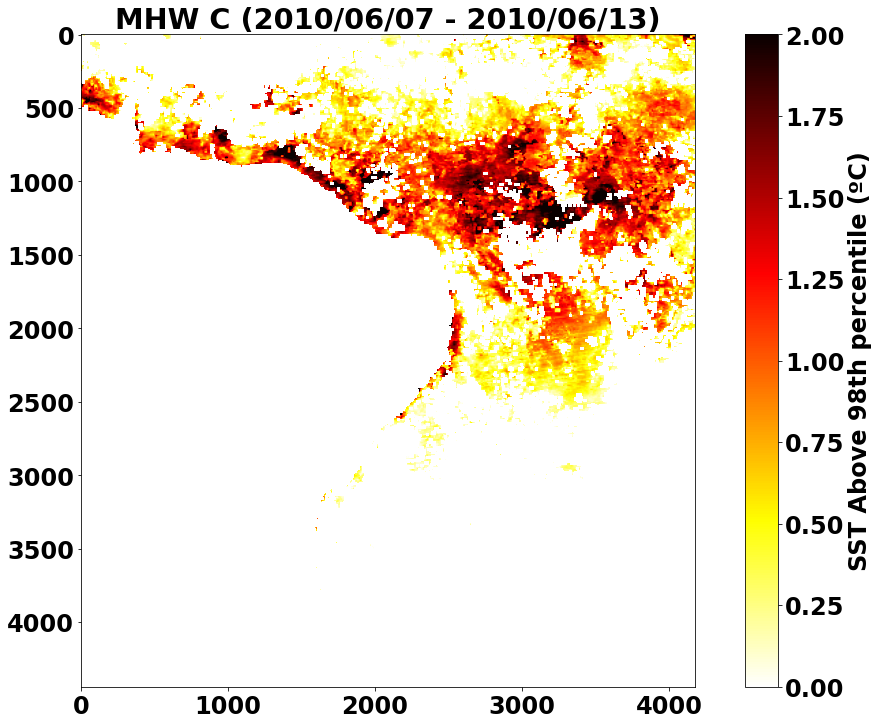

In [100]:
# NORMALIZANDO EM RELAÇÃO A MÉDIA DA COMPONENTE SAZONAL PARA O PERÍODO
normalizado = array - seasonal_avg

# CALCULANDO A ANOMALIA DA TEMPERATURA NORMALIZADA
anomalia = normalizado - above98th

# ANULANDO VALORES DE ANOMALIA NEGATIVA
anomalia[anomalia < 0] = np.nan

# ATUALIZANDO TAMANHO DE TEXTO, LEGENDAS ETC
plt.rcParams.update({'font.size': 24})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.figure(figsize=(18, 12))

# INVERTANDO O CMAP HOT PARA OS VALORES ALTOS CORRESPONDEREM A COR VERMELHA
color_map = plt.cm.get_cmap('hot')
reversed_color_map = color_map.reversed()

# MODIFICAR TÍTULO DA FIGURA
plt.title("MHW C (2010/06/07 - 2010/06/13)", fontweight='bold')

plt.imshow(anomalia, cmap=reversed_color_map)
plt.clim(0,2)
plt.colorbar(label='SST Above 98th percentile (ºC)')

# MODIFICAR NOME DO ARQUIVO PARA SALVAR
plt.savefig('mhw_c_percentile.png',dpi=200, bbox_inches='tight')

3.69268048400669
4.104809262967965
[4.5 5.5 6.5 7.5 8.5]


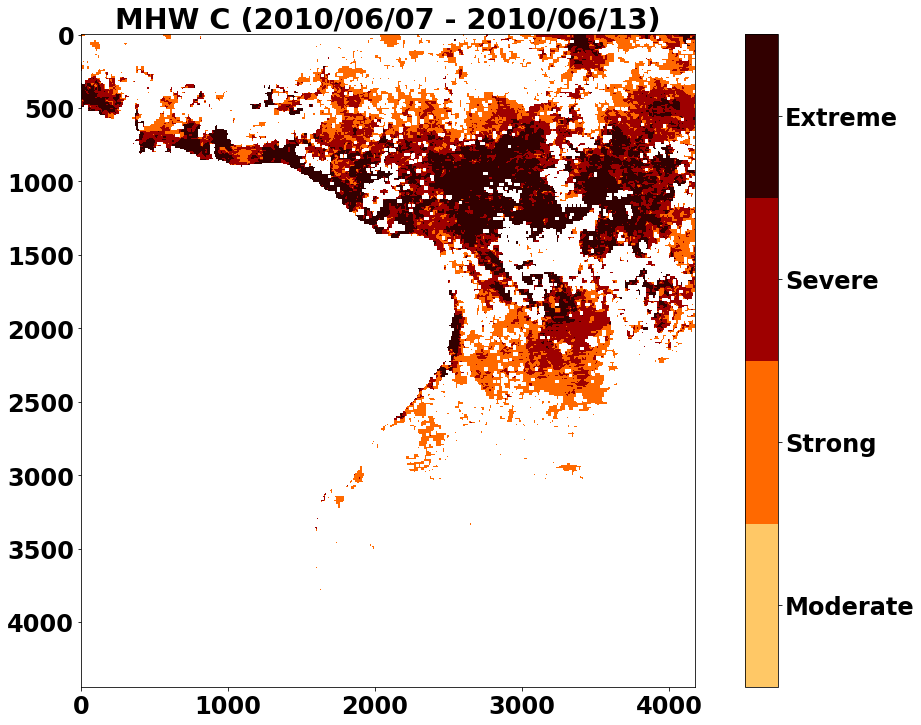

In [101]:
# MULTIPLICANDO POR DELTA_T PARA ENCONTRAR REALIZAR A CLASSIFICAÇÃO
print(np.nanmax(anomalia))
anomalia += diff_99_90
anomalia[(anomalia == diff_99_90)] = np.nan
print(np.nanmax(anomalia))
#anomalia[(anomalia > 0) & (anomalia < (1*delta_t))] = 5 # WEAK
anomalia[anomalia < (2*delta_t)] = 6 # MODERATED
anomalia[(anomalia >= (2*delta_t)) & (anomalia < (3*delta_t))] = 7 # STRONG
anomalia[(anomalia >= (3*delta_t)) & (anomalia < (4*delta_t))] = 8 # SEVERE
anomalia[(anomalia >= (4*delta_t)) & (anomalia < (8*delta_t))] = 9 # EXTREME

# OBS: OS NÚMEROS 5,6,7,8 SÃO USADOS APENAS COMO DUMMY VALUES PARA CLASSIFICAR AS MHW

# Let's also design our color mapping: 1s should be plotted in blue, 2s in red, etc...
col_dict={5:"#ffc866",
          6:"#ff6900",
          7:"#9e0000",
          8:"#320000"}

# We create a colormar from our list of colors
cm = ListedColormap([col_dict[x] for x in col_dict.keys()])

# Let's also define the description of each category : 1 (blue) is Sea; 2 (red) is burnt, etc... Order should be respected here ! Or using another dict maybe could help.
labels = np.array(["Moderate","Strong","Severe", "Extreme"])
len_lab = len(labels)

# prepare normalizer
## Prepare bins for the normalizer
norm_bins = np.sort([*col_dict.keys()]) + 0.5
norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)
print(norm_bins)
## Make normalizer and formatter
norm = mpl.colors.BoundaryNorm(norm_bins, len_lab, clip=True)
fmt = mpl.ticker.FuncFormatter(lambda x, pos: labels[norm(x)])

# Plot our figure
plt.rcParams.update({'font.size': 24})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

fig,ax = plt.subplots(figsize=(18, 12))
im = ax.imshow(anomalia, cmap=cm, norm=norm)
plt.title("MHW C (2010/06/07 - 2010/06/13)", fontweight='bold')

diff = norm_bins[1:] - norm_bins[:-1]
tickz = norm_bins[:-1] + diff / 2
cb = fig.colorbar(im, format=fmt, ticks=tickz)
fig.savefig("clb.png",dpi=200, bbox_inches='tight')
plt.show()

In [102]:
total_pixels = np.count_nonzero(anomalia == 7) + np.count_nonzero(anomalia == 8) + np.count_nonzero(anomalia == 9)
mhw_h_strong = np.count_nonzero(anomalia == 7)
mhw_h_severe = np.count_nonzero(anomalia == 8)
mhw_h_extreme = np.count_nonzero(anomalia == 9)
mhw_h_strong = (mhw_h_strong/total_pixels)*100
mhw_h_severe = (mhw_h_severe/total_pixels)*100
mhw_h_extreme = (mhw_h_extreme/total_pixels)*100

In [104]:
strong = []
severe = []
extreme = []

strong.append(mhw_a_strong)
strong.append(mhw_b_strong)
strong.append(mhw_c_strong)
strong.append(mhw_d_strong)
strong.append(mhw_e_strong)
strong.append(mhw_f_strong)
strong.append(mhw_g_strong)
strong.append(mhw_h_strong)

severe.append(mhw_a_severe)
severe.append(mhw_b_severe)
severe.append(mhw_c_severe)
severe.append(mhw_d_severe)
severe.append(mhw_e_severe)
severe.append(mhw_f_severe)
severe.append(mhw_g_severe)
severe.append(mhw_h_severe)


extreme.append(mhw_a_extreme)
extreme.append(mhw_b_extreme)
extreme.append(mhw_c_extreme)
extreme.append(mhw_d_extreme)
extreme.append(mhw_e_extreme)
extreme.append(mhw_f_extreme)
extreme.append(mhw_g_extreme)
extreme.append(mhw_h_extreme)

classes = ['MHW A', 'MHW B','MHW C','MHW D','MHW E','MHW F','MHW G','MHW H',]

In [103]:
print(mhw_h_strong)
print(mhw_h_severe)

51.915434649972724
33.504998419335855


<ipython-input-119-4d80a1f570cd>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xe)


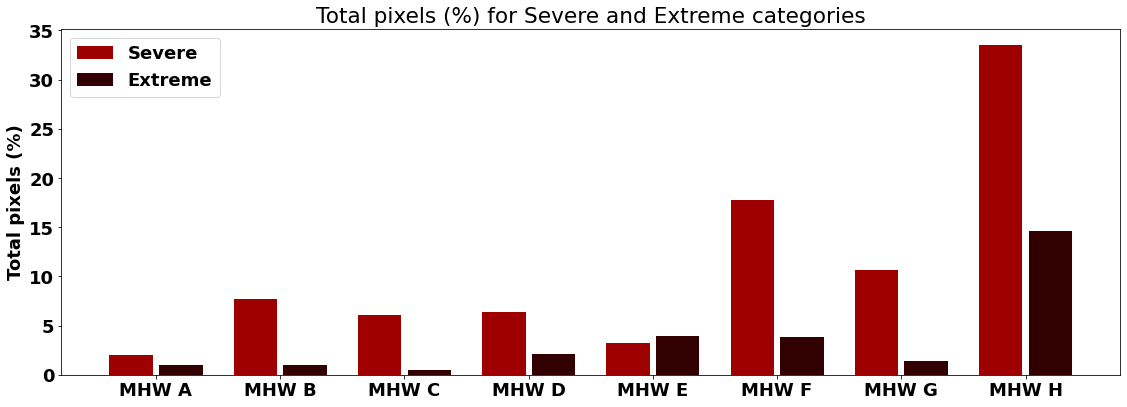

In [119]:
plt.rcParams.update({'font.size': 18})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig, ax = plt.subplots(figsize=(16, 6), sharey=True)

# Gráfico T22KHE

xe = np.arange(len(classes))  # the label locations
width = 0.35  # the width of the bars
ax.bar(xe - 0.2, severe, width, label='Severe', color = "#9e0000")
ax.bar(xe + 0.2, extreme, width, label='Extreme', color = "#320000")
ax.set_ylabel('Total pixels (%)')
ax.set_title('Total pixels (%) for Severe and Extreme categories')
ax.set_xticklabels(xe)
ax.legend()
ax.set_xticks(xe)
ax.set_xticklabels(classes)
ax.legend()


plt.tight_layout()
ax.plot()
plt.savefig('total_pixels.png',dpi=100, bbox_inches='tight')